# Problem Statement
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (w)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_baseball=pd.read_csv('baseball.csv')
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df_baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Checked null value in dataset, there are no any null value is present.

<AxesSubplot:>

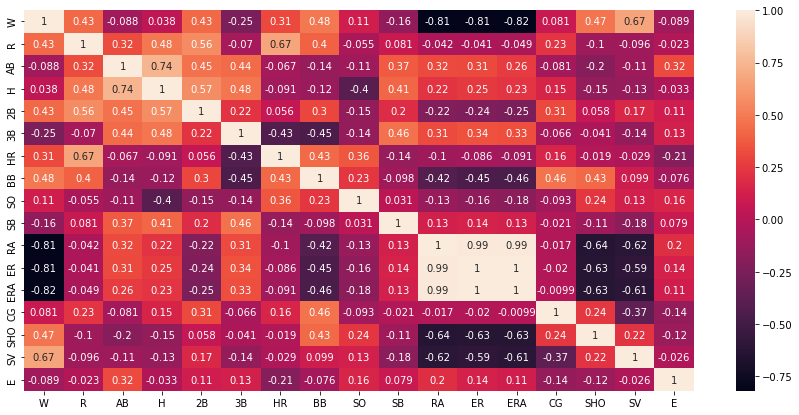

In [5]:
plt.figure(figsize=(15,7))
sns.heatmap(df_baseball.corr(),annot=True)

Displayed Correlation Heatmap, some of features are highy correlated and some are less.

In [6]:
print(df_baseball.skew())
print("Total count of numeric features: ",len(df_baseball.skew()))
print("count of features which are significantly skewed: ",len(df_baseball.skew().loc[abs(df_baseball.skew())>0.5]))

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  7


17 Numeric features there are 7 skewed feature are present.

In [7]:
pip install -U dataprep

  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13918 sha256=287cfd1273e0d3c05735fa2d9a08a966c23c2d968c32ab94caaf004dd454531c
  Stored in directory: c:\users\yuvraj\appdata\local\pip\cache\wheels\b2\9e\d9\26be7687b8fe36cd6cacbec34e825a3dbcd3bae54017cfb385
Successfully built metaphone
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Yuvraj\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Missing Values

In [9]:
import numpy as np
for index in df_baseball.skew().index:
    if df_baseball.skew().loc[index]>0.5:
        df_baseball[index]=np.log1p(df_baseball[index])
    if df_baseball.skew().loc[index]<-0.5:
        df_baseball[index]=np.square(df_baseball[index])
print(df_baseball.skew())
print("Total count of numeric features: ",len(df_baseball.skew()))
print("count of features which are significantly skewed: ",len(df_baseball.skew().loc[abs(df_baseball.skew())>0.5]))

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.632916
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  3


In [10]:
from scipy.stats import zscore
z_score=abs(zscore(df_baseball))
print(df_baseball.shape)
df_baseball_final=df_baseball.loc[(z_score<3).all(axis=1)]
print(df_baseball_final.shape)

(30, 17)
(29, 17)


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_baseball_final)
df_baseball=sc.transform(df_baseball_final)
df_baseball=pd.DataFrame(df_baseball,columns=df_baseball_final.columns)

In [12]:
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.952719,0.830084,1.723726,1.556538,1.010845,-0.734567,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.784917,1.554812,-0.435733
1,0.239947,0.356659,-0.702831,-0.949846,0.201171,1.208917,-0.095232,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.255799,0.296229,-0.598110
2,0.043934,-0.241239,-1.100253,-0.088700,1.733325,-0.276617,-0.655436,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.236912,-0.672787,-1.197382
3,-0.446099,-1.341932,0.233951,-0.347747,-0.800621,-0.474688,-0.855410,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.503159,-0.825263,0.538291
4,-0.642112,0.203902,1.255894,2.030708,0.908319,1.704094,-0.275787,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.255799,-1.142637,-0.598110
5,0.631973,1.765462,0.716535,-0.051906,-0.093474,-1.266972,1.606524,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-2.114661,0.667088,-0.045239
6,0.043934,0.721344,-0.447345,-0.553131,-1.625627,-1.167936,1.735966,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.236912,0.035297,-1.378259
7,-0.054073,-0.816734,-0.447345,-0.310580,0.260100,0.020490,0.282546,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.255799,1.952930,0.105172
8,-0.250086,1.445583,1.752672,1.689389,1.202964,0.119526,0.079663,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.236912,-0.379227,0.252482
9,0.729980,1.506078,-0.078310,0.349394,0.319029,0.020490,0.446156,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.503159,0.296229,1.699369


In [13]:
x=df_baseball.drop(['W'], axis=1)
y=df_baseball[['W']]
print((x.shape),(y.shape))

(29, 16) (29, 1)


# Feature Importance

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_4172\2274008509.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[0.05332688 0.01223799 0.02035397 0.02115996 0.00738329 0.02510706
 0.02564069 0.02236269 0.01402852 0.20876641 0.18977343 0.1917891
 0.01079818 0.01957395 0.1614695  0.01622838]


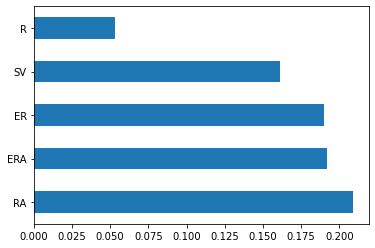

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='W', ylabel='R'>

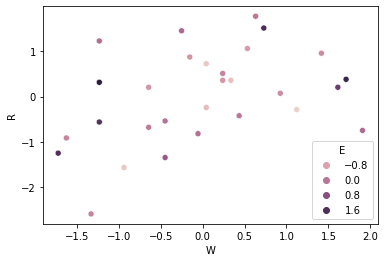

In [17]:
sns.scatterplot(x='W',y='R',hue='E',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='SV'>

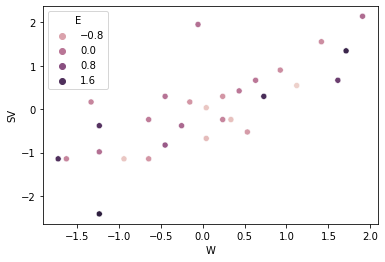

In [18]:
sns.scatterplot(x='W',y='SV',hue='E',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='ERA'>

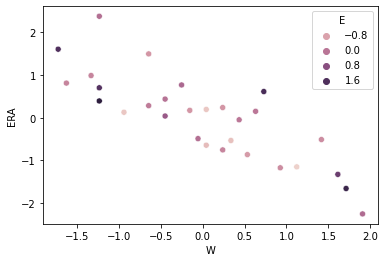

In [19]:
sns.scatterplot(x='W',y='ERA',hue='E',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='ER'>

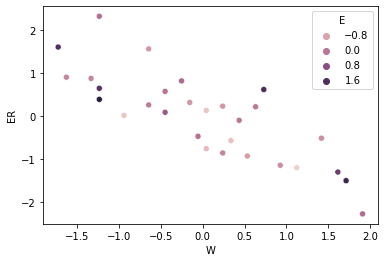

In [20]:
sns.scatterplot(x='W',y='ER',hue='E',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='RA'>

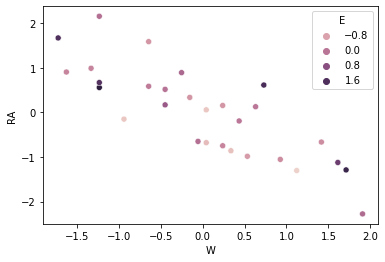

In [21]:
sns.scatterplot(x='W',y='RA',hue='E',data=df_baseball)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.42935304782899875
r2_score corresponding to random state:  43  is:  -1.4279092901154589
r2_score corresponding to random state:  44  is:  0.3946949556592776
r2_score corresponding to random state:  45  is:  0.0993241639145338
r2_score corresponding to random state:  46  is:  0.6891260221610439
r2_score corresponding to random state:  47  is:  -0.3242858094229515
r2_score corresponding to random state:  48  is:  -0.5942679517590894
r2_score corresponding to random state:  49  is:  -0.3627776338891773
r2_score corresponding to random state:  50  is:  0.7725464749312105
r2_score corresponding to random state:  51  is:  0.6585122184343783
r2_score corresponding to random state:  52  is:  0.3990676379979694
r2_score corresponding to random state:  53  is:  0.16898515723468133
r2_score corresponding to random state:  54  is:  -0.09978989207680189
r2_score corresponding to random state:  55  is:  0.7614961370011762
r2_score corresponding to 

Using Logistic Regression found best r2_score corresponding to random state: 73 is: 0.8514870243340503

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

0.028837972270178792

In [29]:
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings("ignore") 
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    svr = SVR()
    svr.fit(x_train,y_train)
    y_pred = svr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.3377745585115687
r2_score corresponding to random state:  43  is:  -0.029905973577661893
r2_score corresponding to random state:  44  is:  0.3901115604428885
r2_score corresponding to random state:  45  is:  0.01956516176433476
r2_score corresponding to random state:  46  is:  0.5061408047111873
r2_score corresponding to random state:  47  is:  0.5809897631225325
r2_score corresponding to random state:  48  is:  0.42769457660651733
r2_score corresponding to random state:  49  is:  -1.5237421170125298
r2_score corresponding to random state:  50  is:  0.2102600375364636
r2_score corresponding to random state:  51  is:  0.3424332607016809
r2_score corresponding to random state:  52  is:  0.14881044299403734
r2_score corresponding to random state:  53  is:  0.37458518123580553
r2_score corresponding to random state:  54  is:  0.5038825729561982
r2_score corresponding to random state:  55  is:  0.5644813342808125
r2_score corresponding to 

Using SVM found best r2_score corresponding to random state: 82 is: 0.639946877684172

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, x, y, cv=5,scoring="r2").mean()

-0.2523830283687972

In [31]:
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred = rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.5557155709342563
r2_score corresponding to random state:  43  is:  0.20361170038272258
r2_score corresponding to random state:  44  is:  0.5111056666666666
r2_score corresponding to random state:  45  is:  -0.04020911552346629
r2_score corresponding to random state:  46  is:  0.8492577432617634
r2_score corresponding to random state:  47  is:  0.7079394366197185
r2_score corresponding to random state:  48  is:  0.7224757676902538
r2_score corresponding to random state:  49  is:  -0.3714328433130152
r2_score corresponding to random state:  50  is:  0.2786591783216783
r2_score corresponding to random state:  51  is:  0.4586172864321607
r2_score corresponding to random state:  52  is:  0.4893153616258217
r2_score corresponding to random state:  53  is:  0.6114748508634221
r2_score corresponding to random state:  54  is:  0.7337457295373666
r2_score corresponding to random state:  55  is:  0.5644510444360045
r2_score corresponding to rand

Using RandomForestRegressor found max r2 score corresponding to 46 is 0.8492577432617634

In [32]:
rfr.base_estimator_

DecisionTreeRegressor()

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr, x, y, cv=5,scoring="r2").mean()

-0.6385564845125055

In [34]:
from sklearn.neighbors import KNeighborsRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.35411764705882354
r2_score corresponding to random state:  43  is:  0.5471623838162931
r2_score corresponding to random state:  44  is:  0.7985333333333333
r2_score corresponding to random state:  45  is:  0.2942960288808666
r2_score corresponding to random state:  46  is:  0.6308451347647328
r2_score corresponding to random state:  47  is:  0.6032394366197183
r2_score corresponding to random state:  48  is:  0.702803738317757
r2_score corresponding to random state:  49  is:  -0.8384223736106131
r2_score corresponding to random state:  50  is:  0.11678321678321668
r2_score corresponding to random state:  51  is:  0.7690050251256282
r2_score corresponding to random state:  52  is:  0.6644590555887628
r2_score corresponding to random state:  53  is:  0.464464678178964
r2_score corresponding to random state:  54  is:  0.7085409252669039
r2_score corresponding to random state:  55  is:  0.34234713254842386
r2_score corresponding to random

Using KNeighborsRegressor found best r2_score corresponding to random state: 44 is: 0.7985333333333333

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x, y, cv=5,scoring="r2").mean()

-0.020669358607313358

In [36]:
from sklearn.tree import DecisionTreeRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    dr=DecisionTreeRegressor()
    dr.fit(x_train,y_train)
    y_pred = dr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  -0.3546712802768166
r2_score corresponding to random state:  43  is:  -1.3258611262985238
r2_score corresponding to random state:  44  is:  -0.32666666666666666
r2_score corresponding to random state:  45  is:  -0.18050541516245477
r2_score corresponding to random state:  46  is:  0.6491548652352672
r2_score corresponding to random state:  47  is:  0.6408450704225352
r2_score corresponding to random state:  48  is:  0.4412550066755676
r2_score corresponding to random state:  49  is:  -0.9082108282538548
r2_score corresponding to random state:  50  is:  -0.7124125874125868
r2_score corresponding to random state:  51  is:  -0.2703517587939701
r2_score corresponding to random state:  52  is:  -0.5026897788404063
r2_score corresponding to random state:  53  is:  0.3802197802197801
r2_score corresponding to random state:  54  is:  -0.4466192170818508
r2_score corresponding to random state:  55  is:  0.6080516521078618
r2_score corresponding 

Using DecisionTreeRegressor found max r2 score corresponding to 65 is 0.7839013778100072

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(dr, x, y, cv=5,scoring="r2").mean()

-2.4085880916296745

In [38]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [39]:
# Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [40]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [41]:
random_cv.fit(x_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:19:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [42]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
regressor.fit(x_train,y_train)

[13:20:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.25, booster='gblinear', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_to_onehot=None,
             max_delta_step=0, max_depth=15, max_leaves=None,
             min_child_weight=4, missing=None, monotone_constraints=None,
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=0, ...)

In [44]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
y_pred=regressor.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.5067050177599717
RMSE is :  0.5111370895227432


In [45]:
#since maximum r2 score is comming around random state 47 we will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 47,test_size=0.20)
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [46]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9699923415492957
RMSE is :  0.19073878267629932


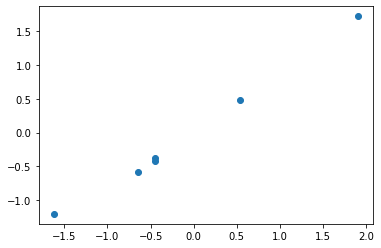

In [47]:
plt.scatter(y_test,y_pred)

<AxesSubplot:ylabel='Density'>

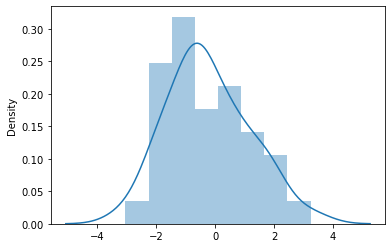

In [48]:
predictions=dr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

Display distplot between predicted and test value found normally disdtrubuted

In [49]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(dr, 'dr_baseball.obj')
pickle.dump(dr,open('dr_baseball.pkl','wb'))

Dump the module using both pickle and joblib.